In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots in Jupyter notebooks (if you're using one)
%matplotlib inline


In [4]:
df=pd.read_csv('Unemployment in India.csv')
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [6]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')


In [8]:
df.rename(columns={'frequency': 'frequency'},inplace=True)

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)


In [10]:
print(df.isnull().sum())

region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64


In [11]:
df=df.dropna()

In [12]:
df=df.drop_duplicates()

In [13]:
print(df['region'].unique())
print(df['area'].unique())
print(df['frequency'].unique())


['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
['Rural' 'Urban']
[' Monthly' 'Monthly']


In [14]:
numeric_cols = [
    'estimated_unemployment_rate_(%)',
    'estimated_employed',
    'estimated_labour_participation_rate_(%)'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [15]:
print(df[numeric_cols].isnull().sum())


estimated_unemployment_rate_(%)            0
estimated_employed                         0
estimated_labour_participation_rate_(%)    0
dtype: int64


In [16]:
print(df.head())
print(df.info())


           region       date frequency  estimated_unemployment_rate_(%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   estimated_employed  estimated_labour_participation_rate_(%)   area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column       

In [17]:
df.to_csv("Cleaned_Unemployment_in_India.csv", index=False)


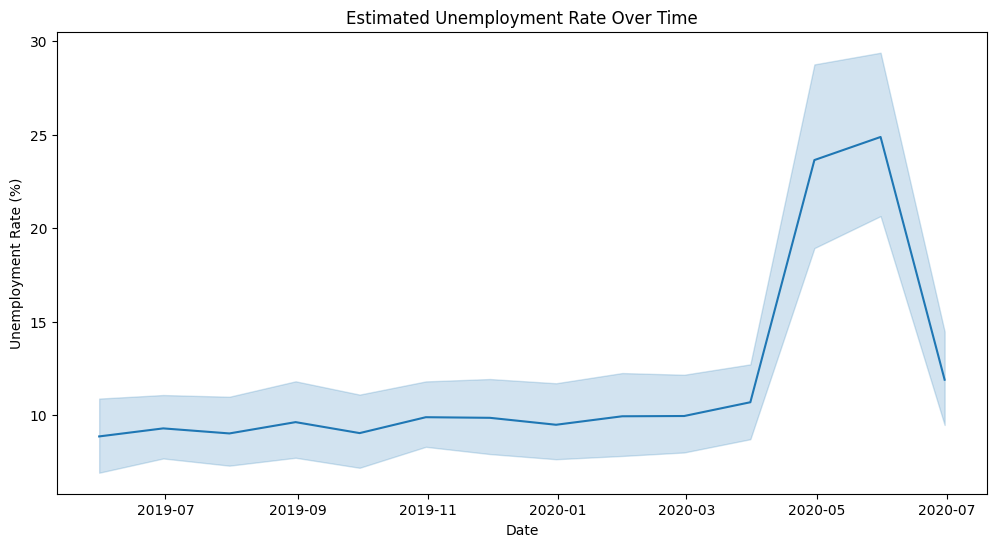

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_(%)')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


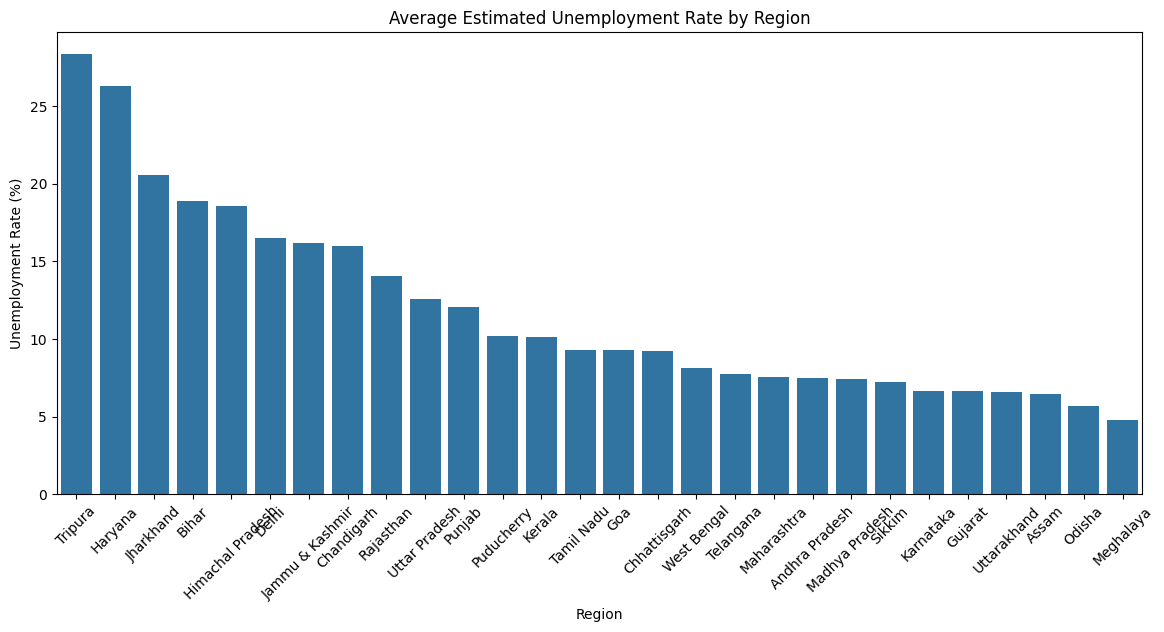

In [19]:
plt.figure(figsize=(14,6))
avg_unemployment = df.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_unemployment.index, y=avg_unemployment.values)
plt.title('Average Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


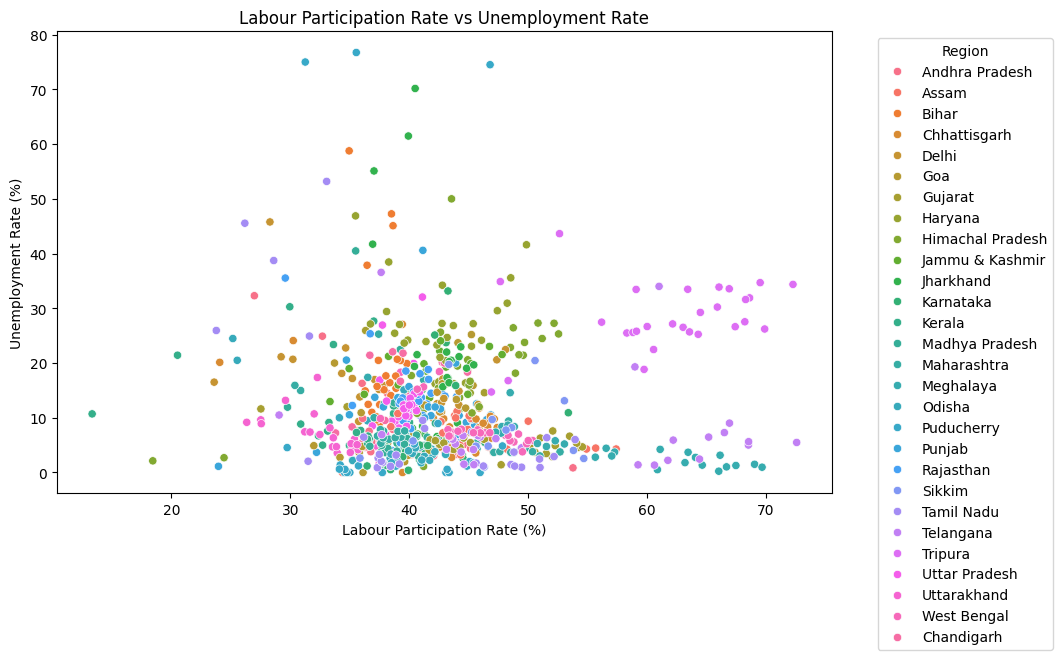

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='estimated_labour_participation_rate_(%)', y='estimated_unemployment_rate_(%)', hue='region')
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


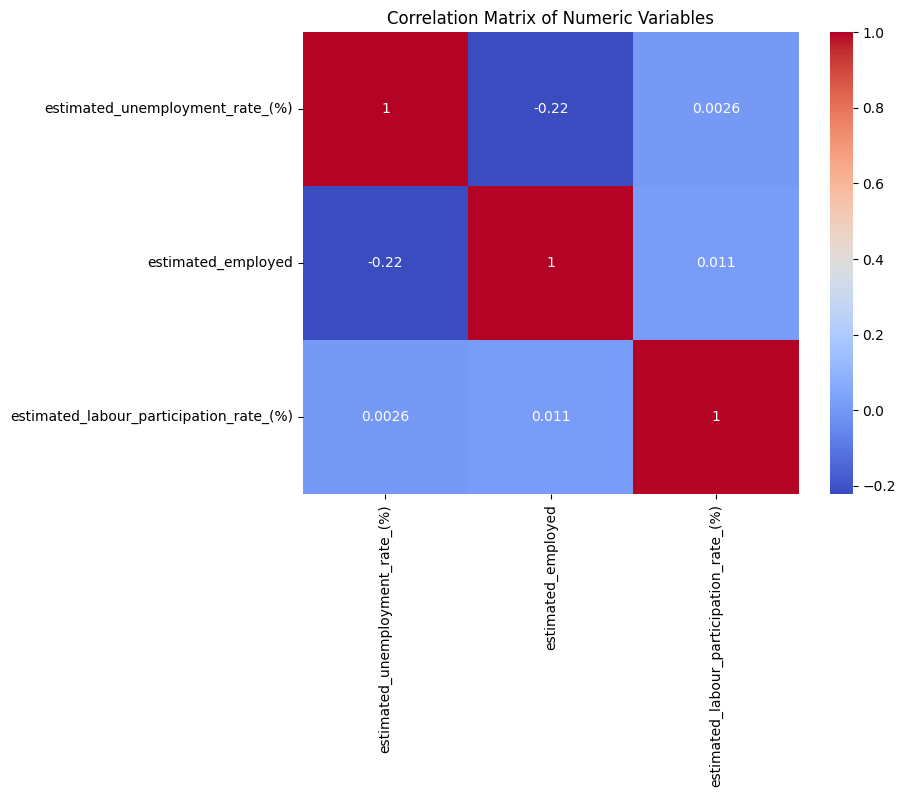

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [23]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Lag feature: unemployment rate from previous month
df['unemployment_rate_lag1'] = df['estimated_unemployment_rate_(%)'].shift(1)

# Drop first row with NaN due to lag
df = df.dropna()


In [24]:
features = ['month', 'year', 'unemployment_rate_lag1']
target = 'estimated_unemployment_rate_(%)'

X = df[features]
y = df[target]

# Split into train and test (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [25]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [26]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MSE: 119.97580709459457
R^2 Score: 0.16683850538888523


In [27]:
last_known = df.iloc[-1]

next_month = (last_known['month'] % 12) + 1
next_year = last_known['year'] + (1 if last_known['month'] == 12 else 0)

X_future = pd.DataFrame({
    'month': [next_month],
    'year': [next_year],
    'unemployment_rate_lag1': [last_known['estimated_unemployment_rate_(%)']]
})

future_prediction = model.predict(X_future)[0]
print(f"Predicted unemployment rate for {next_month}-{next_year}: {future_prediction:.2f}%")


Predicted unemployment rate for 7-2020: 4.59%


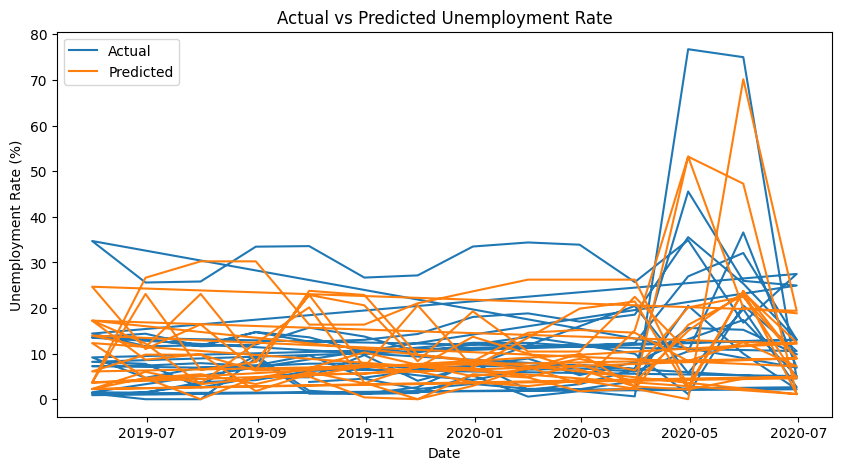

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df['date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()


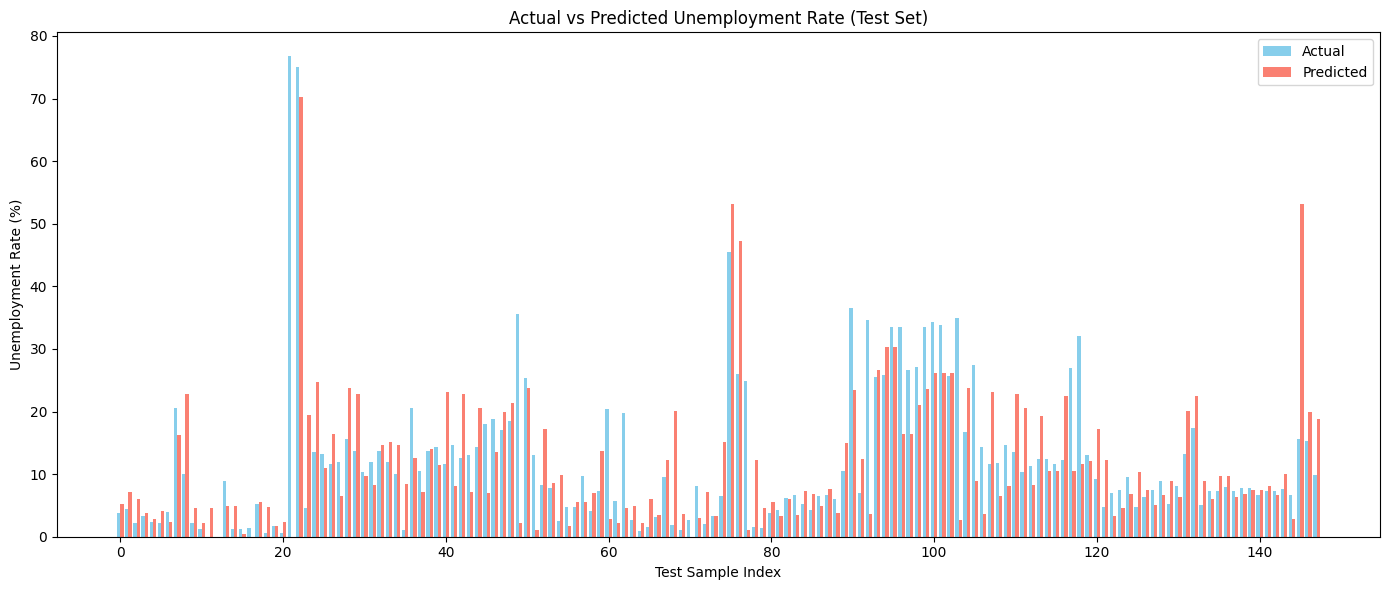

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Optional: reset indices for alignment
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# Plotting
plt.figure(figsize=(14,6))
bar_width = 0.4
x = np.arange(len(y_test))

plt.bar(x - bar_width/2, y_test, width=bar_width, label='Actual', color='skyblue')
plt.bar(x + bar_width/2, y_pred, width=bar_width, label='Predicted', color='salmon')

plt.xlabel('Test Sample Index')
plt.ylabel('Unemployment Rate (%)')
plt.title('Actual vs Predicted Unemployment Rate (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()


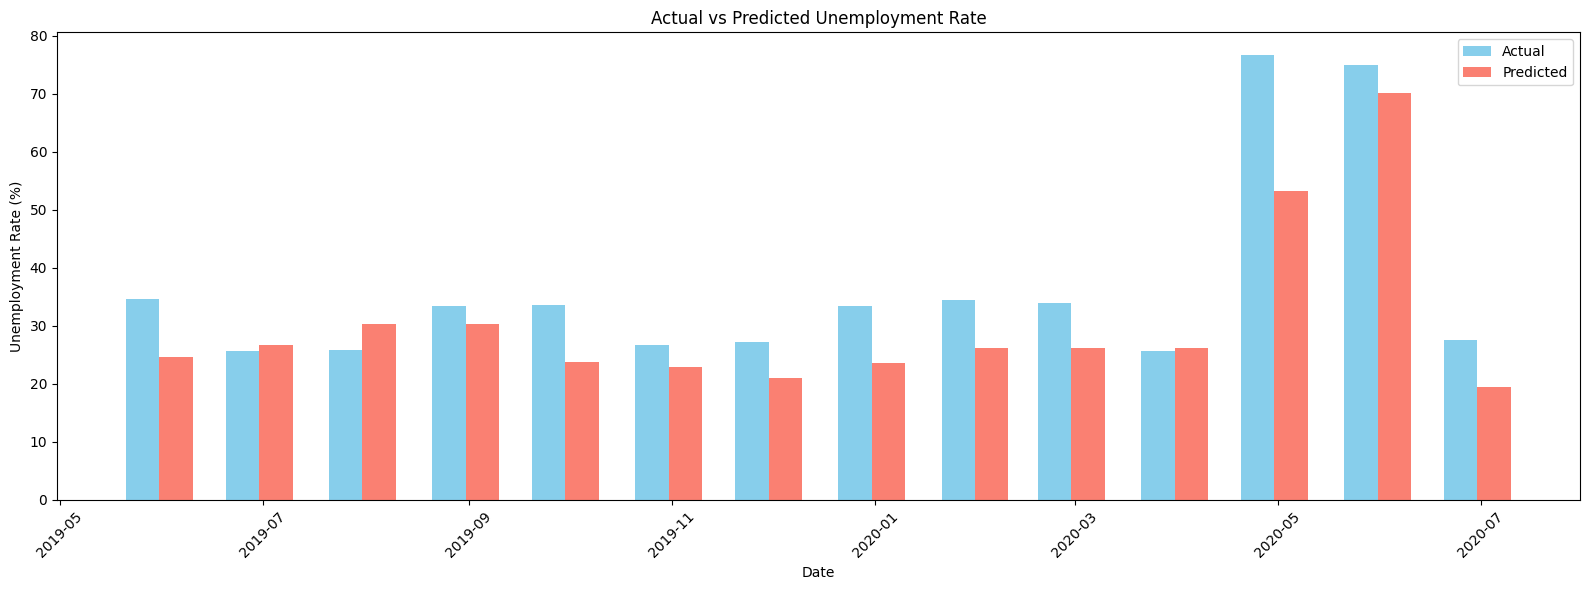

In [30]:
dates = df['date'].iloc[-len(y_test):].reset_index(drop=True)

plt.figure(figsize=(16,6))
plt.bar(dates - pd.Timedelta(days=5), y_test, width=10, label='Actual', color='skyblue')
plt.bar(dates + pd.Timedelta(days=5), y_pred, width=10, label='Predicted', color='salmon')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Actual vs Predicted Unemployment Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [33]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

def prepare_state_data(df, state):
    # Filter data for the input state/region
    state_df = df[df['region'].str.lower() == state.lower()].copy()
    
    # Extract year and month from date
    state_df['year'] = state_df['date'].dt.year
    state_df['month'] = state_df['date'].dt.month
    
    # Create lag feature
    state_df['unemployment_rate_lag1'] = state_df['estimated_unemployment_rate_(%)'].shift(1)
    
    # Drop rows with missing values (due to lag)
    state_df = state_df.dropna()
    
    return state_df

def train_model_for_state(state_df):
    features = ['year', 'month', 'unemployment_rate_lag1']
    target = 'estimated_unemployment_rate_(%)'
    
    X = state_df[features]
    y = state_df[target]
    
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)
    
    return model

def predict_unemployment_rate(df, state, year):
    state_df = prepare_state_data(df, state)
    if state_df.empty:
        return f"No data available for the state '{state}'"
    
    model = train_model_for_state(state_df)
    
    # Use the last known unemployment rate as lag for prediction start
    last_known = state_df[state_df['year'] < year].iloc[-1]
    last_lag = last_known['estimated_unemployment_rate_(%)']
    
    predictions = []
    for month in range(1, 13):
        X_pred = pd.DataFrame({
            'year': [year],
            'month': [month],
            'unemployment_rate_lag1': [last_lag]
        })
        pred = model.predict(X_pred)[0]
        predictions.append(pred)
        last_lag = pred  # update lag for next month prediction
    
    avg_prediction = np.mean(predictions)
    return f"Predicted average unemployment rate for {state.title()} in {year} is {avg_prediction:.2f}%"


df = pd.read_csv("Cleaned_Unemployment_in_India.csv") # Make sure df is loaded & cleaned
df['date'] = pd.to_datetime(df['date'])
print(predict_unemployment_rate(df, 'Kerala', 2024))


Predicted average unemployment rate for Kerala in 2024 is 17.50%


In [34]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

def prepare_state_data(df, state):
    state_df = df[df['region'].str.lower() == state.lower()].copy()
    if state_df.empty:
        return None
    
    state_df['year'] = state_df['date'].dt.year
    state_df['month'] = state_df['date'].dt.month
    state_df['unemployment_rate_lag1'] = state_df['estimated_unemployment_rate_(%)'].shift(1)
    state_df = state_df.dropna()
    return state_df

def train_model_for_state(state_df):
    features = ['year', 'month', 'unemployment_rate_lag1']
    target = 'estimated_unemployment_rate_(%)'
    X = state_df[features]
    y = state_df[target]
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)
    return model

def predict_unemployment_rate(df, state, year):
    state_df = prepare_state_data(df, state)
    if state_df is None:
        return f"No data available for the state '{state}'. Please check the spelling or try another state."
    
    model = train_model_for_state(state_df)
    
    # Get last known lag before the target year
    past_data = state_df[state_df['year'] < year]
    if past_data.empty:
        return f"Not enough historical data to predict for {state} in {year}."
    
    last_known = past_data.iloc[-1]
    last_lag = last_known['estimated_unemployment_rate_(%)']
    
    predictions = []
    for month in range(1, 13):
        X_pred = pd.DataFrame({
            'year': [year],
            'month': [month],
            'unemployment_rate_lag1': [last_lag]
        })
        pred = model.predict(X_pred)[0]
        predictions.append(pred)
        last_lag = pred
    
    avg_prediction = np.mean(predictions)
    return f"Predicted average unemployment rate for {state.title()} in {year} is {avg_prediction:.2f}%"

# -------------------------
# Main program
# -------------------------

if __name__ == "__main__":
    # Load and clean your data first (make sure this matches your cleaned dataset)
    df = pd.read_csv("Cleaned_Unemployment_in_India.csv")
    df['date'] = pd.to_datetime(df['date'])
    
    # Get user input
    user_state = input("Enter the state/region name: ").strip()
    user_year = int(input("Enter the year (e.g., 2024): ").strip())
    
    # Predict and show result
    result = predict_unemployment_rate(df, user_state, user_year)
    print(result)


Enter the state/region name:  andhra pradesh
Enter the year (e.g., 2024):  2028


Predicted average unemployment rate for Andhra Pradesh in 2028 is 5.89%


In [36]:
import matplotlib.pyplot as plt


In [37]:
def predict_unemployment_rate(df, state, year):
    state_df = prepare_state_data(df, state)
    if state_df is None:
        return f"No data available for the state '{state}'. Please check the spelling or try another state.", None, None
    
    model = train_model_for_state(state_df)

    past_data = state_df[state_df['year'] < year]
    if past_data.empty:
        return f"Not enough historical data to predict for {state} in {year}.", None, None

    # Use most recent known value for lag
    past_data = past_data.sort_values(by='date')
    last_known = past_data.iloc[-1]
    last_lag = last_known['estimated_unemployment_rate_(%)']
    
    predictions = []
    months = list(range(1, 13))
    for month in months:
        X_pred = pd.DataFrame({
            'year': [year],
            'month': [month],
            'unemployment_rate_lag1': [last_lag]
        })
        pred = model.predict(X_pred)[0]
        predictions.append(pred)
        last_lag = pred

    avg_prediction = np.mean(predictions)

    # Prepare actual data from previous year
    prev_year = year - 1
    actual_data = state_df[state_df['year'] == prev_year].copy()
    actual_data = actual_data.sort_values(by='month')
    
    return (
        f"Predicted average unemployment rate for {state.title()} in {year} is {avg_prediction:.2f}%",
        actual_data,
        predictions
    )


In [38]:
def plot_predictions(state, year, actual_data, predictions):
    plt.figure(figsize=(10, 6))

    months = list(range(1, 13))
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Plot actual data (previous year)
    if actual_data is not None and not actual_data.empty:
        plt.bar(months, actual_data['estimated_unemployment_rate_(%)'],
                width=0.4, label=f'Actual {year - 1}', align='center')

    # Plot predicted data (target year)
    plt.bar([m + 0.4 for m in months], predictions,
            width=0.4, label=f'Predicted {year}', color='orange', align='center')

    plt.xticks([m + 0.2 for m in months], month_labels)
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.title(f"Unemployment Rate for {state.title()}: Actual vs Predicted")
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Enter the state/region name:  andhra pradesh
Enter the year (e.g., 2024):  2029


Predicted average unemployment rate for Andhra Pradesh in 2029 is 5.89%


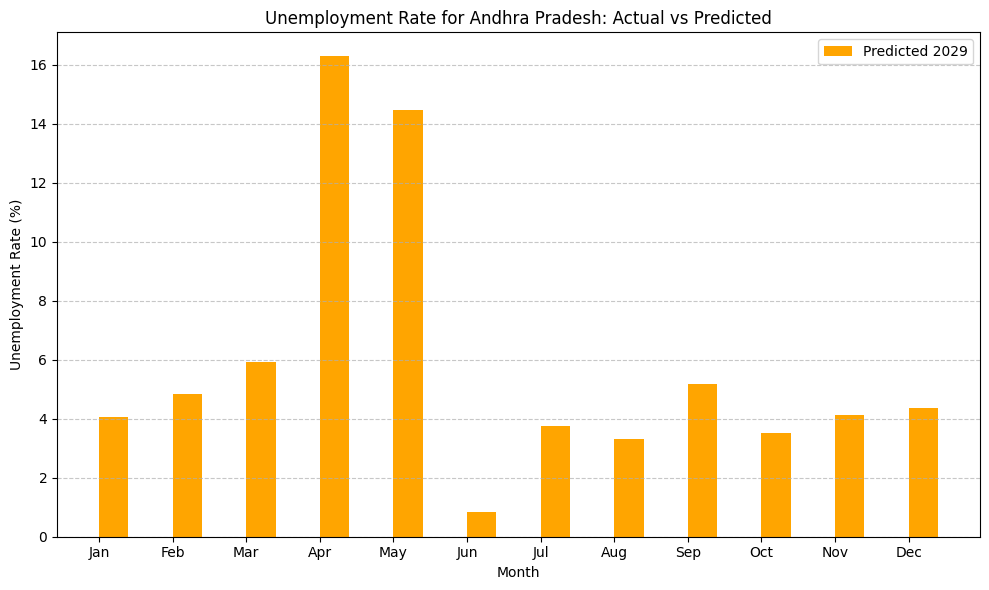

In [39]:
if __name__ == "__main__":
    df = pd.read_csv("Cleaned_Unemployment_in_India.csv")
    df['date'] = pd.to_datetime(df['date'])

    user_state = input("Enter the state/region name: ").strip()
    user_year = int(input("Enter the year (e.g., 2024): ").strip())

    result_text, actual_data, predictions = predict_unemployment_rate(df, user_state, user_year)
    print(result_text)

    if predictions:
        plot_predictions(user_state, user_year, actual_data, predictions)
